## **SMOOTHING AND BLURRING**

**Blurring** happens when a **camera takes a picture out of focus**.

**Sharper regions** in the image **lose their detail**.

The goal here is to **use a low-pass filter** to **reduce the amount of noise and detail in an image**.

By reducing the detail in an image we can more **easily find objects** that we are interested in.

Furthermore, this allows us to **focus on the larger structural objects** in the image.

**Types of Blurring**:


1.   Averaging
2.   Gaussian blurring
3.   Median filtering
4.   Bilateral filtering

### **Averaging**:

An **average filter** or **Box filter** or **Mean filter** considers an **area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.**

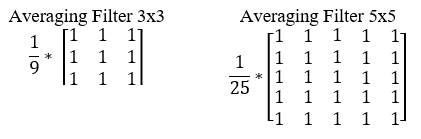

Certain **properties** of Averaging filter are,
1. It must be odd ordered
2. The sum of all the elements should be 1
3. All the elements should be same

Increasing the size of the filter will result in increasing the amount of blur.

### **Gaussian**:

Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a **weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.**

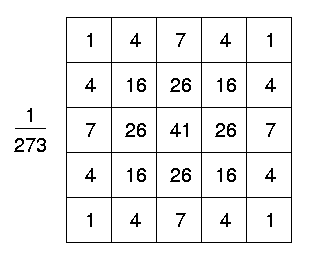

And as the name suggests, Gaussian smoothing is used to **remove noise that approximately follows a Gaussian distribution.**

The end result is that our image is less blurred, but more **naturally blurred**, than using the average method.

Furthermore, based on this weighting we’ll be **able to preserve more of the edges in our image** as compared to average smoothing.

### **Median**:

Unlike the averaging method, instead of replacing the central pixel with the average of the neighborhood, we instead **replace the central pixel with the median of the neighborhood.**

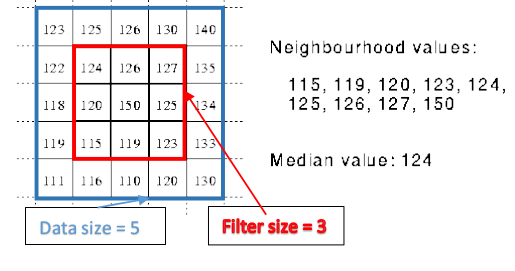

Most effective when **removing salt-and-pepper noise.**

The **kernel size for the median must be square**.

For **damaged images or photos captured under highly sub-optimal conditions**, a median blur can really help as a preprocessing step prior to passing the image along to other methods, such as thresholding and edge detection.

### **Bilateral**:

Thus far, the intention of our blurring methods have been to **reduce noise and detail** in an image; however, as a side effect we have tended to **lose edges in the image**.

In order to **reduce noise while still maintaining edges**, we can use **bilateral blurring**.

Bilateral blurring accomplishes this by introducing **two Gaussian distributions.**

The **first** Gaussian function only **considers spatial neighbors**.

That is, pixels that appear close together in the (x, y)-coordinate space of the image.

The **second** Gaussian model **considers the pixel intensity of the neighborhood**, ensuring that **only pixels with similar intensity are included in the actual computation of the blur**.

Overall, this method is **able to preserve edges of an image, while still reducing noise**.

The largest downside to this method is that it is **considerably slower** than its averaging, Gaussian, and median blurring counterparts.

In [1]:
# import the necessary packages
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
from google.colab import files
apj = files.upload()

Saving apj.jpg to apj.jpg


APJ Image


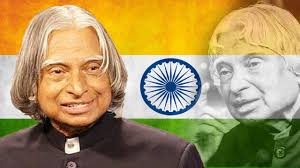

In [3]:
# load the image, display it, and initialize the list of kernel sizes
image = cv2.imread("apj.jpg")
print("APJ Image")
cv2_imshow(image)

Original Image


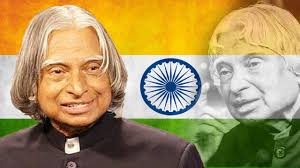



Average Blurring (3, 3)


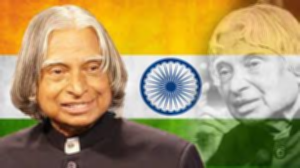



Average Blurring (5, 5)


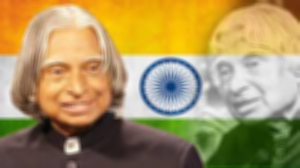



Average Blurring (7, 7)


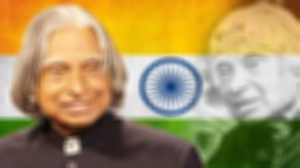

In [4]:
kernelSizes = [(3,3), (5,5), (7,7)]

print("Original Image")
cv2_imshow(image)
print("\n")

# loop over the kernel sizes and apply an "average" blur to the image
for (kX, kY) in kernelSizes:
	blurred = cv2.blur(image, (kX, kY))
	print("Average Blurring ({}, {})".format(kX, kY))
	cv2_imshow(blurred)
	print("\n")

Original Image


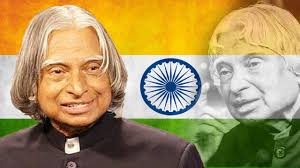



Gaussian Blurring (3, 3)


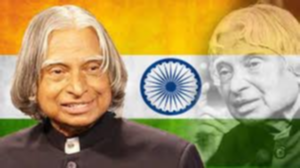



Gaussian Blurring (5, 5)


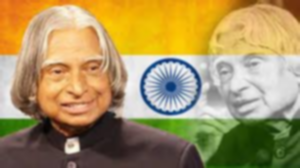



Gaussian Blurring (7, 7)


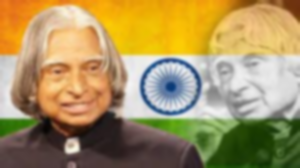

In [5]:
print("Original Image")
cv2_imshow(image)
print("\n")

# loop over the kernel sizes and apply a "Gaussian" blur to the image
for (kX, kY) in kernelSizes:
	blurred = cv2.GaussianBlur(image, (kX, kY), 0)
	print("Gaussian Blurring ({}, {})".format(kX, kY))
	cv2_imshow(blurred)
	print("\n")

Original Image


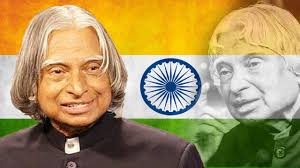



Median Blurring (3, 3)


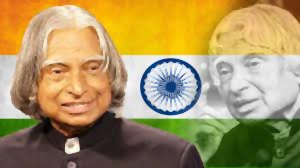



Median Blurring (5, 5)


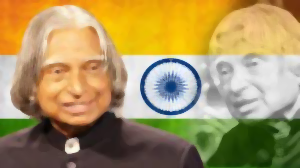



Median Blurring (7, 7)


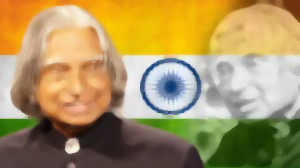

In [6]:
print("Original Image")
cv2_imshow(image)
print("\n")

# loop over the kernel sizes and apply a "Median" blur to the image
for k in (3, 5, 7):
	blurred = cv2.medianBlur(image, k)
	print("Median Blurring ({}, {})".format(k, k))
	cv2_imshow(blurred)
	print("\n")

Original Image


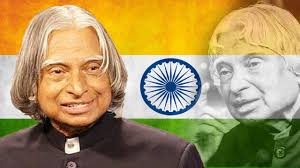



Bilateral Filtering d=11, sc=21, ss=7


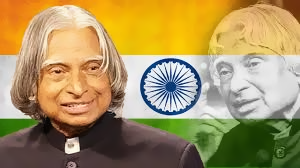



Bilateral Filtering d=11, sc=41, ss=21


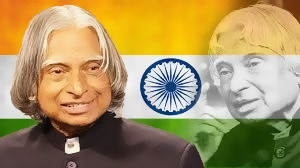



Bilateral Filtering d=11, sc=61, ss=39


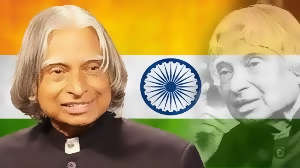

In [7]:
print("Original Image")
cv2_imshow(image)
print("\n")

params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
# the larger the diameter, the more pixels will be included in the blurring computation
# A larger value for sigma color means that more colors in the neighborhood will be considered when
# computing the blur. If we let sigma color get too large in respect to the diameter, then we essentially
# have broken the assumption of bilateral filtering that only pixels of similar color should
# contribute significantly to the blur.
# Finally, we need to supply the space standard deviation (sigma space). A larger value of sigma space means
# that pixels farther out from the central pixel diameter will less influence the blurring calculation.
# apply bilateral filtering and display the image
for (diameter, sigmaColor, sigmaSpace) in params:
	blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
	print("Bilateral Filtering d={}, sc={}, ss={}".format(diameter, sigmaColor, sigmaSpace))
	cv2_imshow(blurred)
	print("\n")